<a href="https://colab.research.google.com/github/the-nameshifter/Artificial-Neural-Networks/blob/main/Titanic_Classification_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


- Target class: Survived: Survival	(0 = No, 1 = Yes)

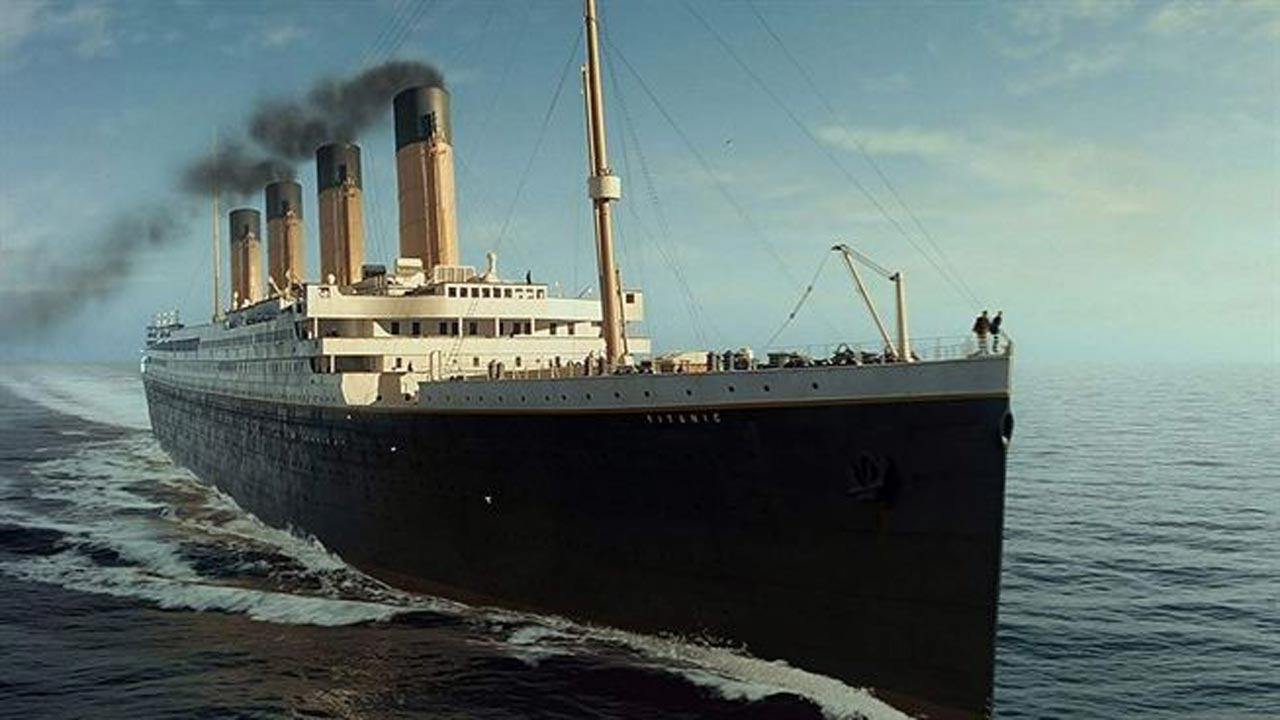

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Dataset_training = pd.read_csv('/content/Train_Titanic.csv')

In [3]:
Dataset_training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Dataset_training.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
survived = Dataset_training[Dataset_training['Survived']== 1 ]
no_survived = Dataset_training[Dataset_training['Survived']== 0 ]

In [6]:
print('Total = ', len(Dataset_training))

Total =  891


In [7]:
print('Number of passneger who survived =', len(survived))
print('Number of passneger who did not survived =', len(no_survived))

Number of passneger who survived = 342
Number of passneger who did not survived = 549


In [8]:
print('% Survived =', len(survived)*100/891)

% Survived = 38.38383838383838


In [9]:
print('% Did not Survived =', len(no_survived)*100/len(Dataset_training))

% Did not Survived = 61.61616161616162


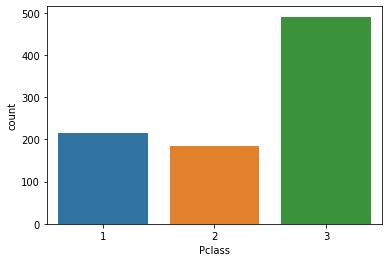

In [10]:
sns.countplot(x =  'Pclass', data= Dataset_training)

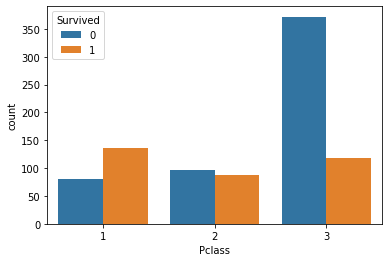

In [11]:
sns.countplot(x =  'Pclass', hue = 'Survived', data= Dataset_training)

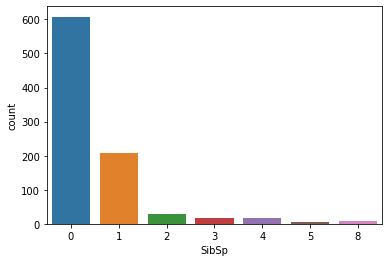

In [12]:
sns.countplot(x =  'SibSp', data= Dataset_training)

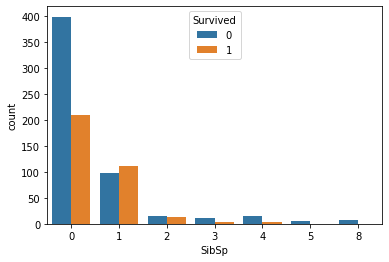

In [13]:
sns.countplot(x =  'SibSp', hue = 'Survived', data= Dataset_training)

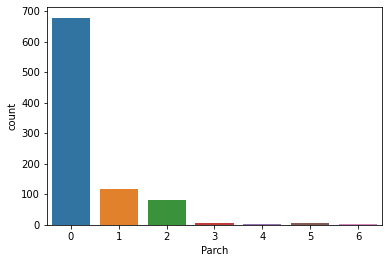

In [14]:
sns.countplot(x =  'Parch', data= Dataset_training)

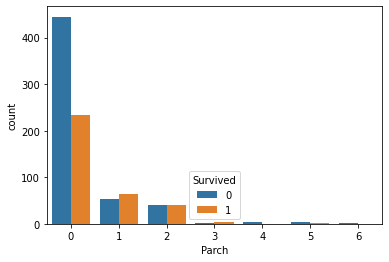

In [15]:
sns.countplot(x =  'Parch', hue = 'Survived', data= Dataset_training)

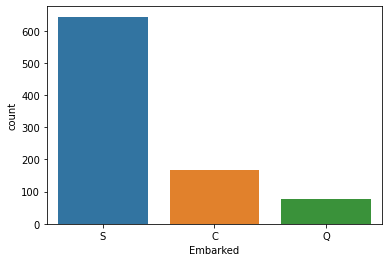

In [16]:
sns.countplot(x =  'Embarked', data= Dataset_training)

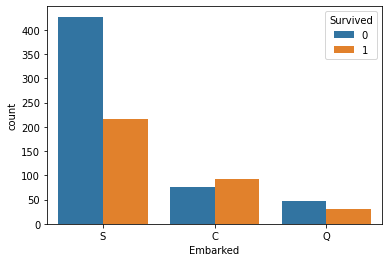

In [17]:
sns.countplot(x =  'Embarked', hue = 'Survived', data= Dataset_training)

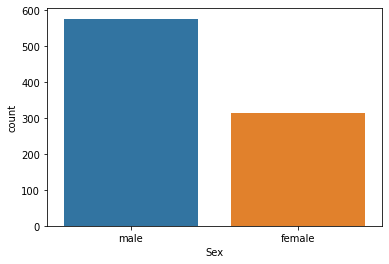

In [18]:
sns.countplot(x =  'Sex', data= Dataset_training)

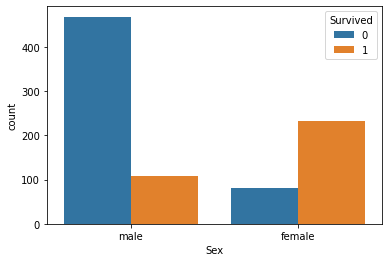

In [19]:
sns.countplot(x =  'Sex', hue = 'Survived', data= Dataset_training)

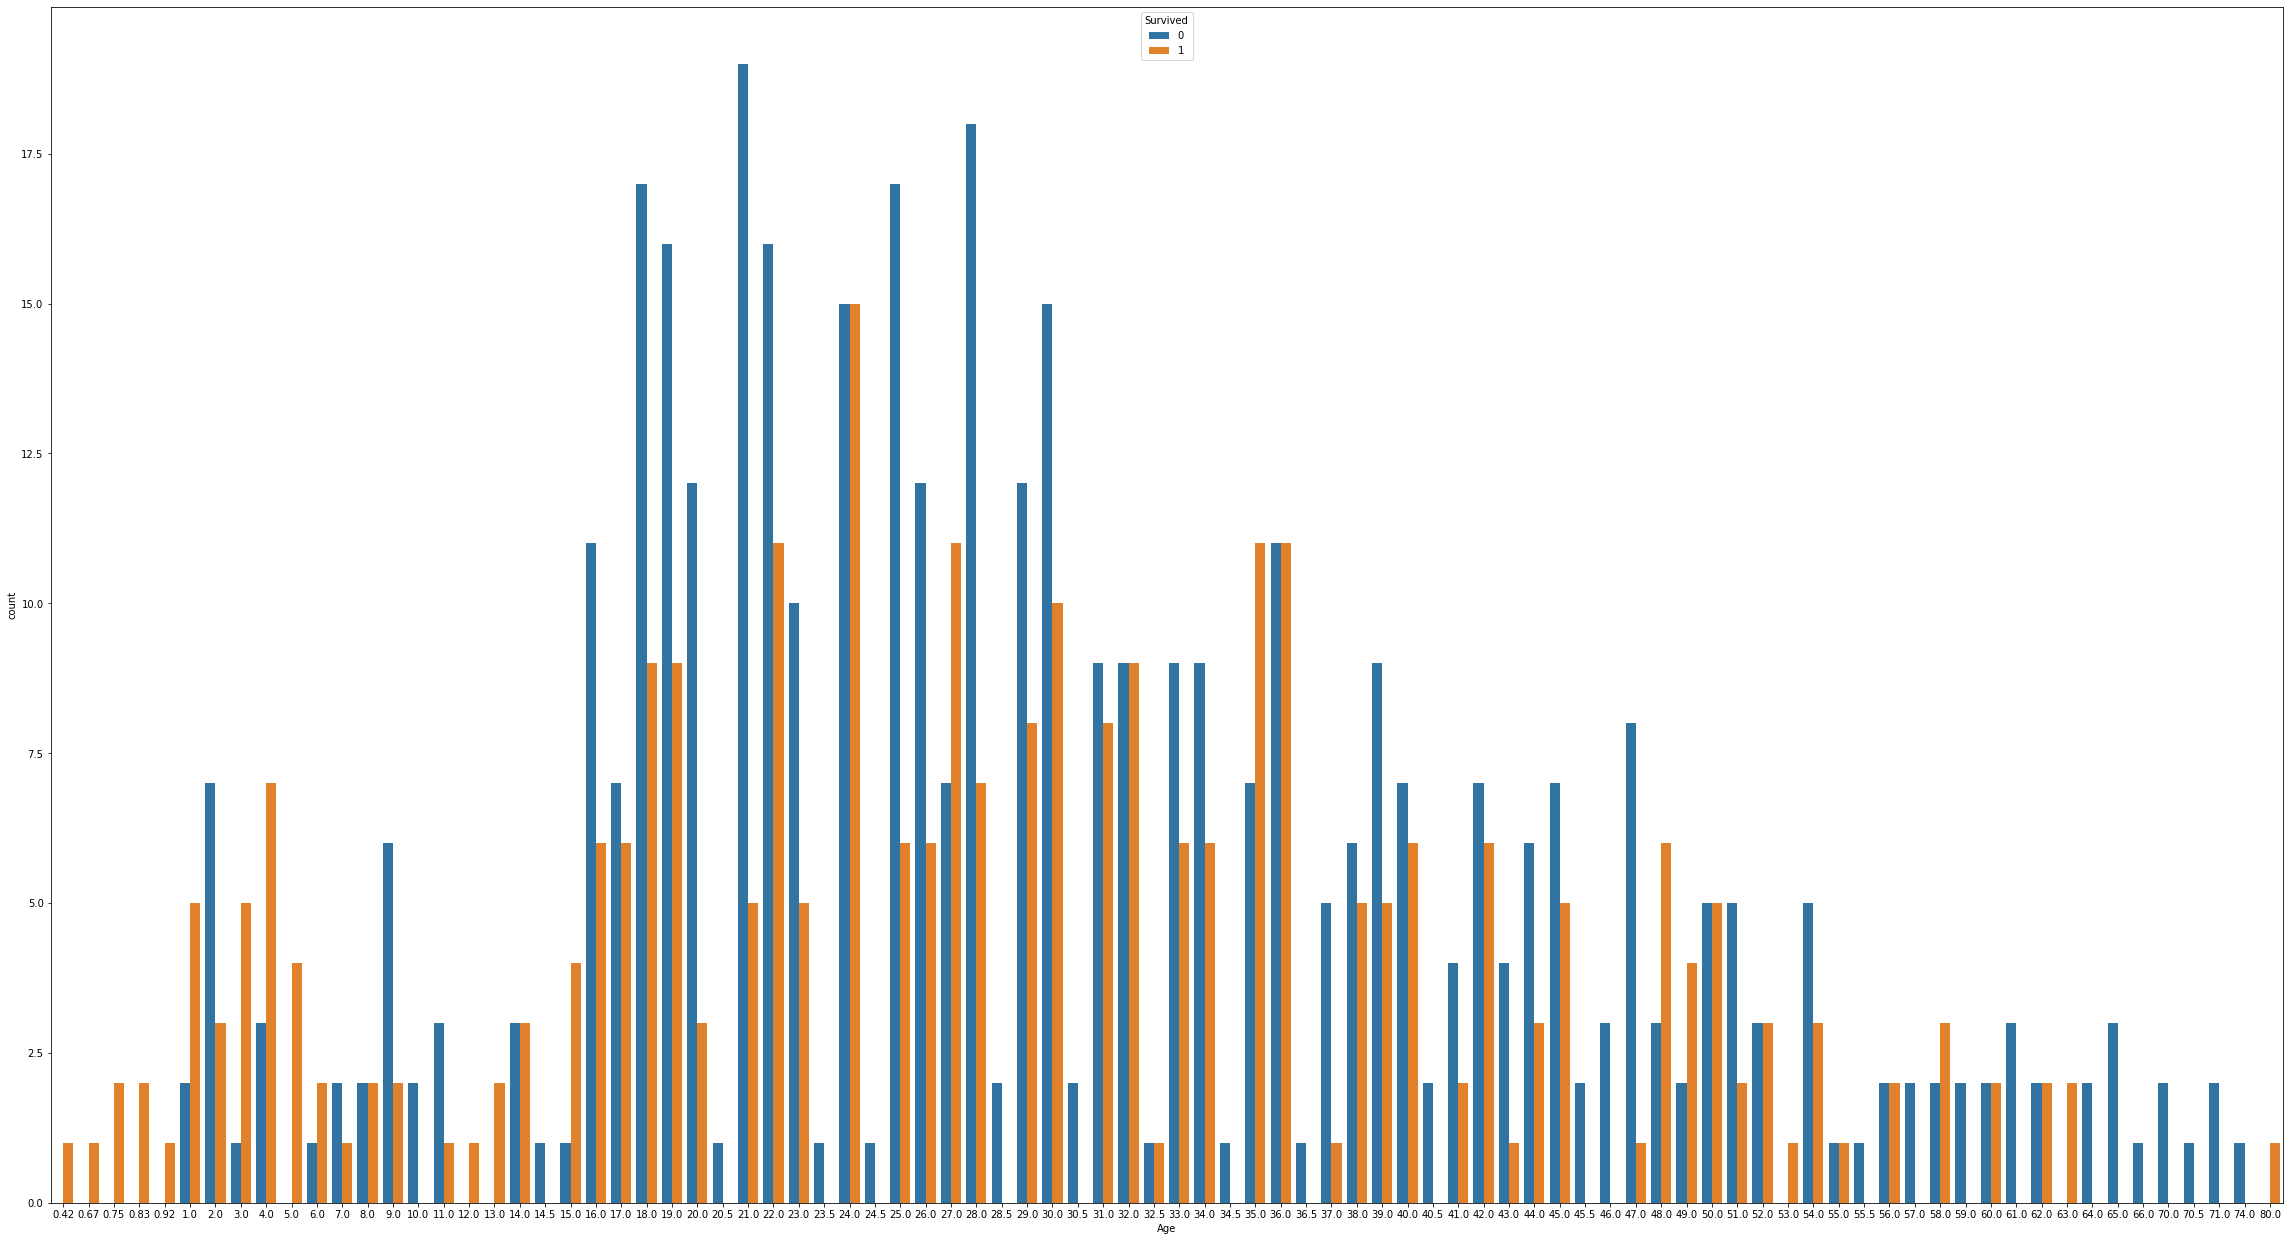

In [20]:
plt.figure(figsize = (40, 22))
sns.countplot(x = 'Age', hue = 'Survived', data= Dataset_training)

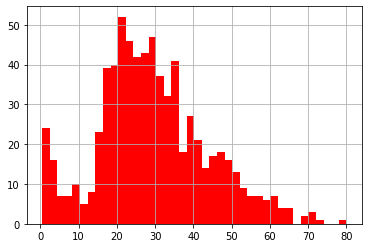

In [21]:
Dataset_training['Age'].hist(bins = 40, color = 'red')

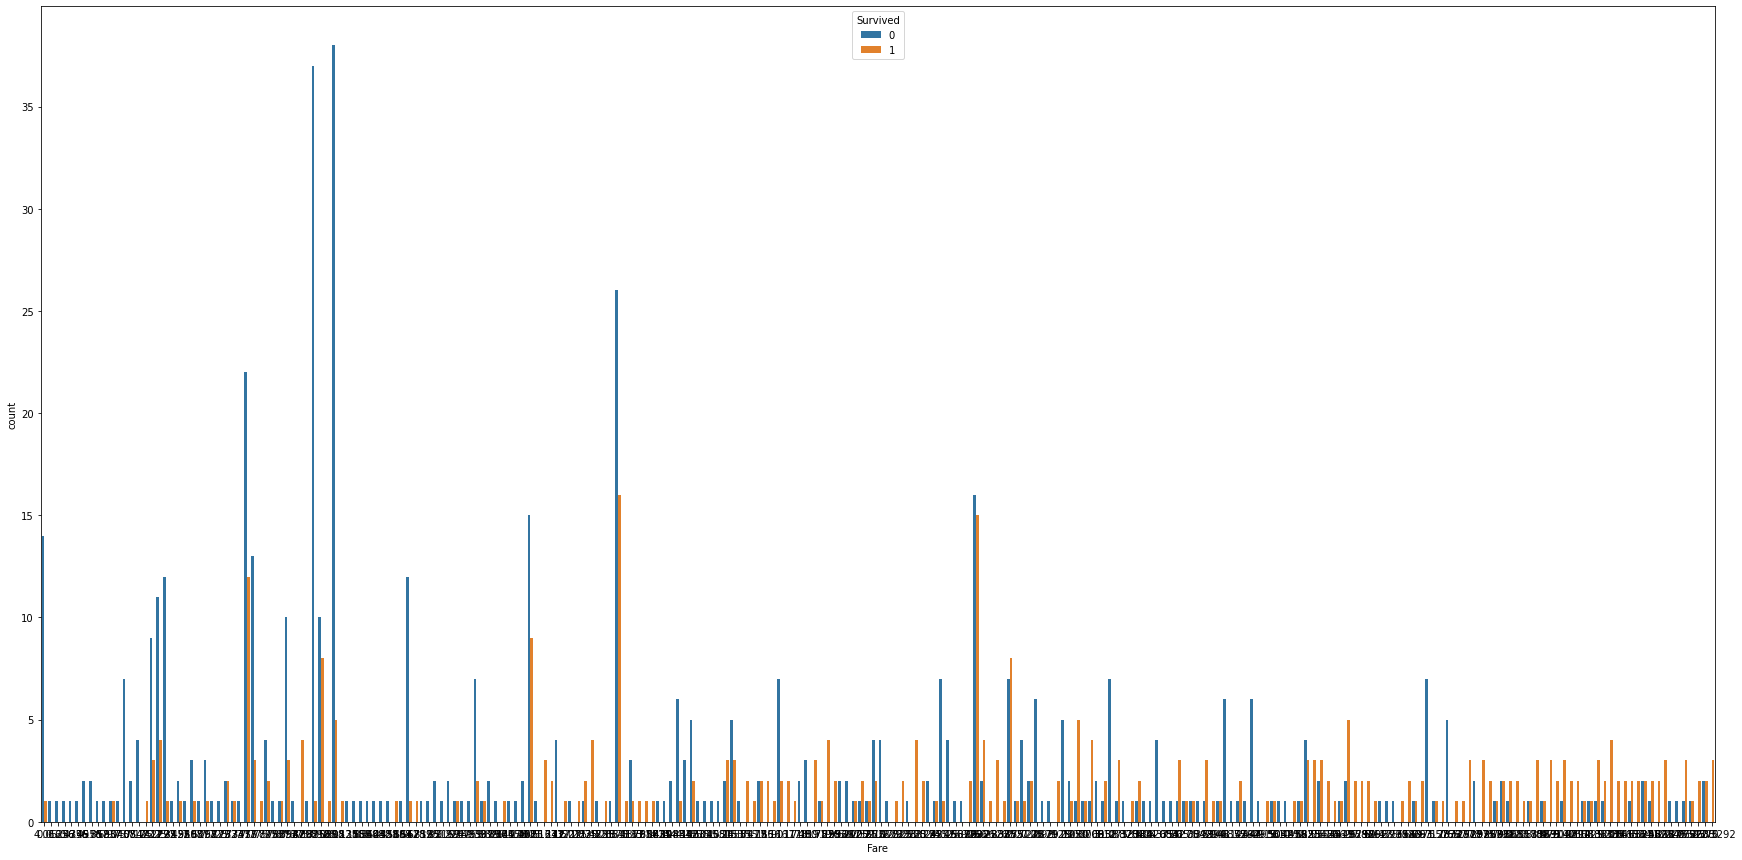

In [22]:
plt.figure(figsize = (30, 15))
sns.countplot(x = 'Fare', hue = 'Survived', data= Dataset_training)

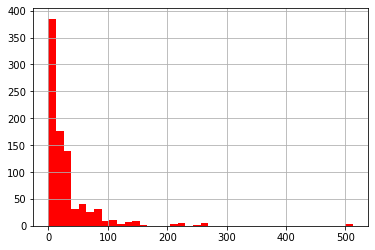

In [23]:
Dataset_training['Fare'].hist(bins = 40, color = 'red')

# Prepare the data for training 

In [24]:
Dataset_training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


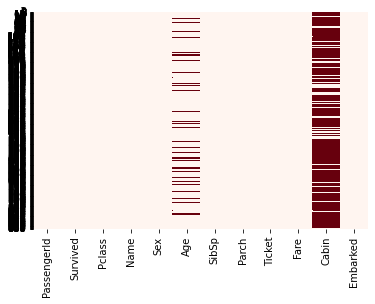

In [25]:
sns.heatmap(Dataset_training.isnull(), yticklabels = True, cbar = False, cmap = 'Reds')

In [26]:
Dataset_training.drop('Cabin', axis = 1, inplace = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [28]:
Dataset_training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
Dataset_training.drop('Cabin', axis = 1, inplace = True)

In [30]:
Dataset_training.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


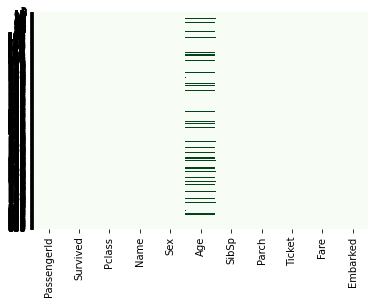

In [31]:
sns.heatmap(Dataset_training.isnull(), yticklabels = True, cbar = False, cmap = 'Greens')

In [32]:
Dataset_training.drop(['Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [33]:
Dataset_training.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000


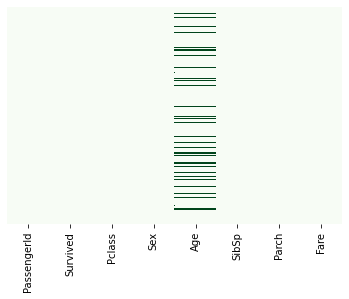

In [35]:
sns.heatmap(Dataset_training.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

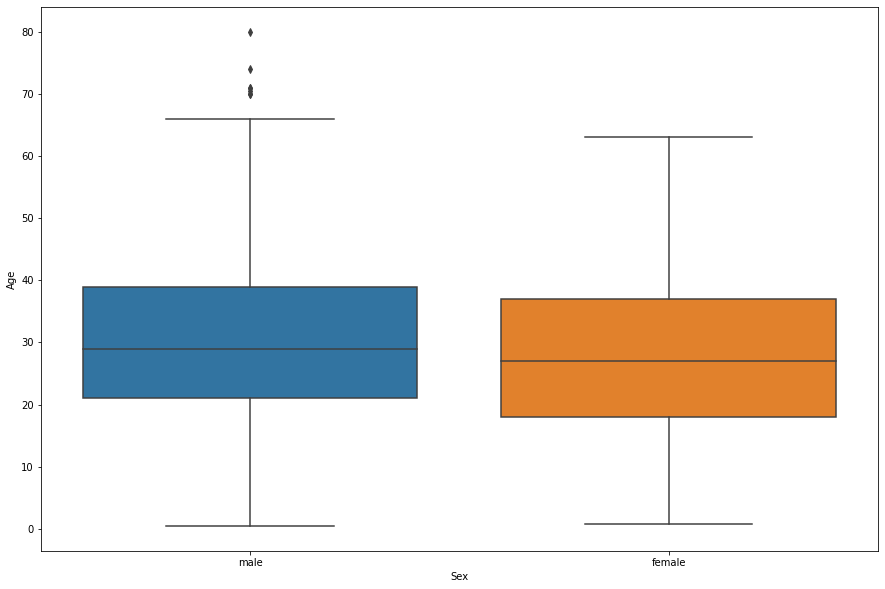

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Sex', y = 'Age', data= Dataset_training)

In [38]:
def Fill_Age(data):
  age = data[0]
  sex = data[1]

  if pd.isnull(age):
    if sex is 'male':
      return 29
    else:
      return 27

  else:
      return age


In [39]:
Dataset_training['Age'] = Dataset_training[['Age', 'Sex']].apply(Fill_Age, axis=1)

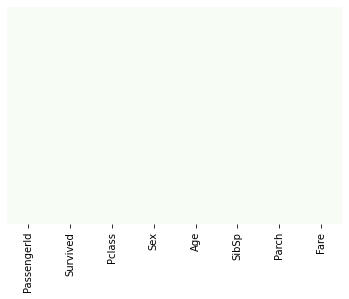

In [40]:
sns.heatmap(Dataset_training.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7bf5b2610>]],
      dtype=object)

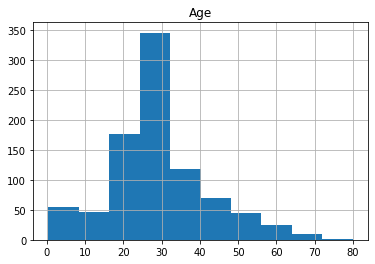

In [41]:
Dataset_training.hist('Age')

In [42]:
Dataset_training.drop(['PassengerId'], axis= 1, inplace= True)

In [43]:
Dataset_training.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000


In [46]:
male = pd.get_dummies(Dataset_training['Sex'])

In [48]:
male.head(4)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0




> Modificamos un poco para hacer una sola columna en lugar de dos



In [49]:
male = pd.get_dummies(Dataset_training['Sex'], drop_first = True)

In [50]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [51]:
  Dataset_training.drop(['Sex'], axis = 1, inplace =True)

In [52]:
Dataset_training.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000


In [53]:
Dataset_training = pd.concat([Dataset_training, male], axis = 1)

In [54]:
Dataset_training.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0


In [55]:
X = Dataset_training.drop('Survived', axis = 1).values

In [56]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 27.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [57]:
y = Dataset_training['Survived'].values

In [59]:
y.shape

(891,)

# Model Training

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [63]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()
Classifier.fit(X_train, y_train)

LogisticRegression()

# Model Testing

In [65]:
y_predict = Classifier.predict(X_test)

In [66]:
y_predict

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

0.8212290502793296


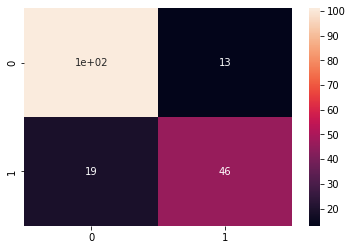

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_predict, y_test))